# Analysis

In [2]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

Upon analyzing the dataset, we observed that the "snow" feature is consistently zero. Since this feature is redundant and does not contribute any meaningful information to the model, it was removed.

Additionally, the confusion(correlation) matrix revealed collinearity among several features, suggesting that they exhibit strong linear dependencies. To address this, a PCA transformation was applied to the dataset. This step reduces dimensionality by eliminating redundant features, ensuring that the model focuses on the most informative components and mitigates issues arising from multicollinearity.

Given the significant class imbalance in the dataset, we experimented with various methods to address this issue. These included oversampling the minority class, undersampling the majority class, and employing a synthetic technique (e.g., SMOTE, Synthetic Minority Oversampling Technique) to generate new samples for the minority class. Each approach was evaluated one model (AdaBoost) to determine its impact on model performance and to select the most effective strategy for balancing the dataset. The method we decided on was oversampling. 

As a result of our experimentation, the final pipeline incorporated a PCA transformation followed by oversampling of the dataset. This combination addressed feature redundancy and class imbalance.

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0.0,16.3,31.6,16.0,0
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0.0,23.9,85.7,16.0,0
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0.0,0.0,81.1,16.0,0
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0.0,19.2,0.0,16.0,0
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0.0,10.5,44.6,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0.0,10.6,24.4,16.0,0
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0.0,9.8,92.1,10.4,0
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,2.0,18.2,79.3,16.0,0
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0.0,5.8,24.4,16.0,1


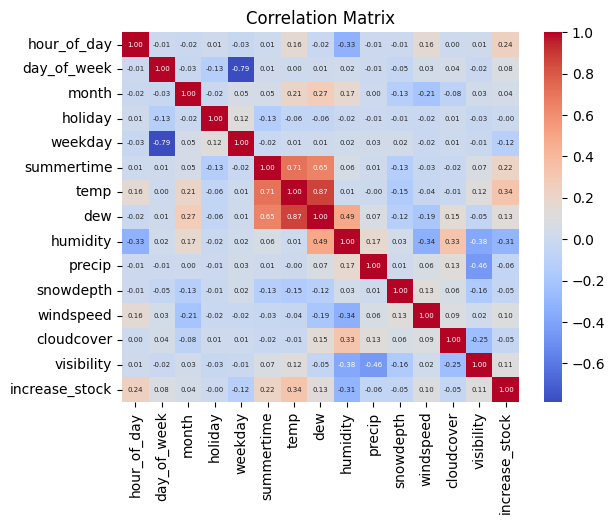

Total no. TN=1312
Total no. TP=288


In [5]:
data = pd.read_csv('training_data_fall2024.csv')
data['increase_stock'] = data['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1})
data = data.drop(['snow'], axis=1)
count_no_bikes = (data['increase_stock'] == 0).sum()
count_yes_bikes = (data['increase_stock'] == 1).sum()
data_len = len(data)
display(data)
plt.figure()
corr_matrix = data.corr()
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 5})
plt.title('Correlation Matrix')
plt.show()
print(f'Total no. TN={count_no_bikes}')
print(f'Total no. TP={count_yes_bikes}')